# NBA Advanced Metrics Analysis 
### <span style="color:#83898b">How do advanced metrics influence players' salaries?</span>

Name: Abdul Muqit Afzal

Student ID: 100878995

# Methods
### Data Collection

A publicly available dataset containing NBA statistics from the 2022-2023 season can be accessed on [Kaggle](https://www.kaggle.com/), a popular platform for sharing and exploring a wide variety of datasets. The dataset I am using is received from there

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import pandas as pd
%pip install seaborn
import seaborn as sns
from IPython.display import display

<ipython-input-1-c9b1f874cb76>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load Data
nba = pd.read_csv('nba_2022-23_all_stats_with_salary.csv')


## Data Cleaning


The columns in this dataset after TS% are not needed so I have removed them and another unneeded column at the start. The floating point precision has also been modified.

In [3]:
pd.set_option('display.precision', 2)
df = pd.DataFrame(nba)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

end_index = df.columns.get_loc('TS%') + 1  # Add 1 to include 'TS%' column
df = df.iloc[:, :end_index]
df = df.dropna(axis=0)
display(df)

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.66
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.50
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.51
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.58
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Jay Scrubb,49719,SG,22,ORL,2,0,15.0,2.5,3.5,...,3.0,0.5,1.0,0.0,1.5,1.0,6.5,30,14.2,0.82
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,3.8,1.0,0.5,1.3,1.0,2.3,4.3,89,4.0,0.36
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,0.8,1.0,0.0,0.4,0.2,0.0,1.0,28,9.0,0.36
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,2.0,1.7,0.7,0.0,0.0,1.7,8.0,56,11.8,0.55


# Analyses


I will explore the relationship between players points per game, age and positions and how they have an affect on the players salaries with exploratory analyses, consisting of statistical summaries and visualisations. 


### Distributions



To start off, I will put the salaries of NBA Players in three categories - low, medium, and high - and then go on to mention the first and most important factor in calculating the salaries of NBA Players.


In [4]:
salary_bins = [0, 5e6, 10e6, float('inf')]
salary_labels = ['Low', 'Medium', 'High']

nba['Salary Category'] = pd.cut(nba['Salary'], bins=salary_bins, labels=salary_labels, right=False)

display(nba[['Player Name', 'Salary', 'Salary Category']])

,Player Name,Salary,Salary Category
0,Stephen Curry,48070014,High
1,John Wall,47345760,High
2,Russell Westbrook,47080179,High
3,LeBron James,44474988,High
4,Kevin Durant,44119845,High
...,...,...,...
462,Justin Minaya,35096,Low
463,Kobi Simmons,32795,Low
464,Gabe York,32171,Low
465,RaiQuan Gray,5849,Low


PTS, meaning Points Per Game, definitely has a really big effect on the player's salary. This is obvious due to the nature of the game as the highest-scoring individual is probably playing a huge role in winning the game for the team, therefore he gets paid the most.

## Points Per Game

In [5]:
ds = nba.PTS.describe()
display(f"Mean Points Per Game: {round(ds['mean'],2)}")
display(f"Max Points Per Game: {round(ds['max'],2)}")
display(f"Min Points Per Game: {round(ds['min'],2)*12}")

'Mean Points Per Game: 9.13'

'Max Points Per Game: 33.1'

'Min Points Per Game: 0.0'

## Points Per Game Vs Salaries

Below the graph shows a clear cut pattern between salary and ppg. As points per game increase the salary also increases

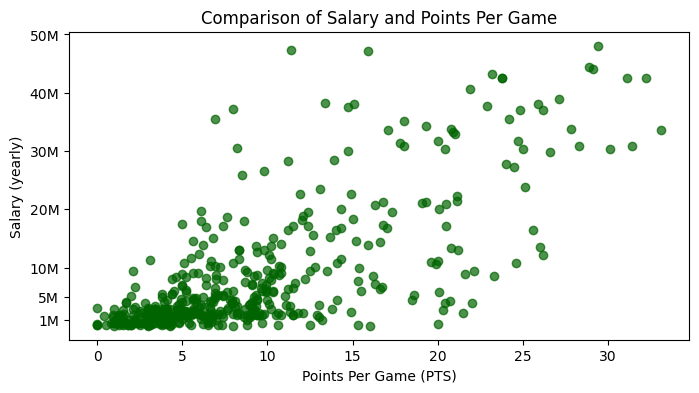

In [6]:
# Ensure the dataset is loaded and contains 'PTS' and 'Salary'
if {'PTS', 'Salary'}.issubset(nba.columns):
    plt.figure(figsize=(8, 4))

    plt.scatter(nba['PTS'], nba['Salary'], color='darkgreen', alpha=0.7)

    yticks = [1_000_000, 5_000_000, 10_000_000, 20_000_000, 30_000_000, 40_000_000, 50_000_000]
    yticklabels = ['1M', '5M', '10M', '20M', '30M', '40M', '50M']
    plt.yticks(yticks, labels=yticklabels)

    plt.title('Comparison of Salary and Points Per Game')
    plt.xlabel('Points Per Game (PTS)')
    plt.ylabel('Salary (yearly)')

    plt.show()

The table below also shows the same pattern with a few outliers here and there.

In [7]:
df = (nba[['Salary' , 'PTS']])
display(df)

,Salary,PTS
0,48070014,29.4
1,47345760,11.4
2,47080179,15.9
3,44474988,28.9
4,44119845,29.1
...,...,...
462,35096,4.3
463,32795,1.0
464,32171,8.0
465,5849,16.0


This shows that Points Per Game has a fair impact on the players' salaries.

## Total Minutes Played

The total minutes played by a player can represent the amount of work he put in and so I am analyzing its effects on the players' salaries

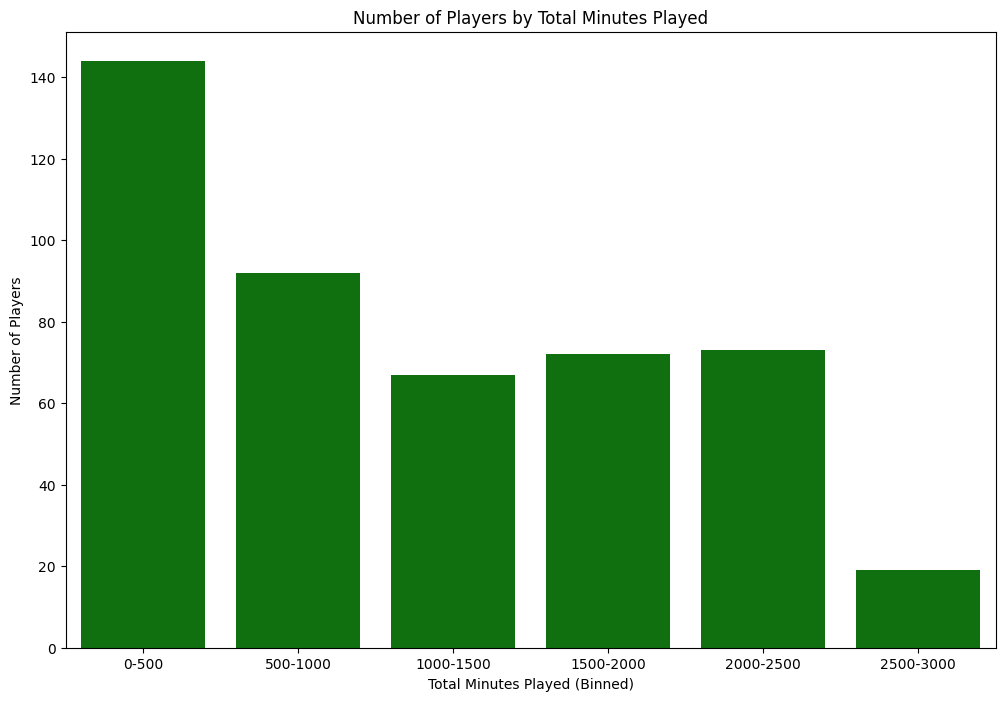

In [8]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
nba['Minutes_Bin'] = pd.cut(nba['Total Minutes'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.countplot(x='Minutes_Bin', data=nba, color='green')
plt.title('Number of Players by Total Minutes Played')
plt.xlabel('Total Minutes Played (Binned)')
plt.ylabel('Number of Players')
plt.show()


We can see that most players play between 0-1000 minutes and then the population decreases for more time played. However, lets see how this affects salaries.

## Total Minutes Played and Salary

The graph below shows that total minutes played have a significant impact on the salary of players. Players are paid more salaries when they play more. But also, in the graph above, we saw the players who are putting in more time are also less in number. This could possibly mean that the best of the best are the ones having to put in more time, as well as getting paid less.

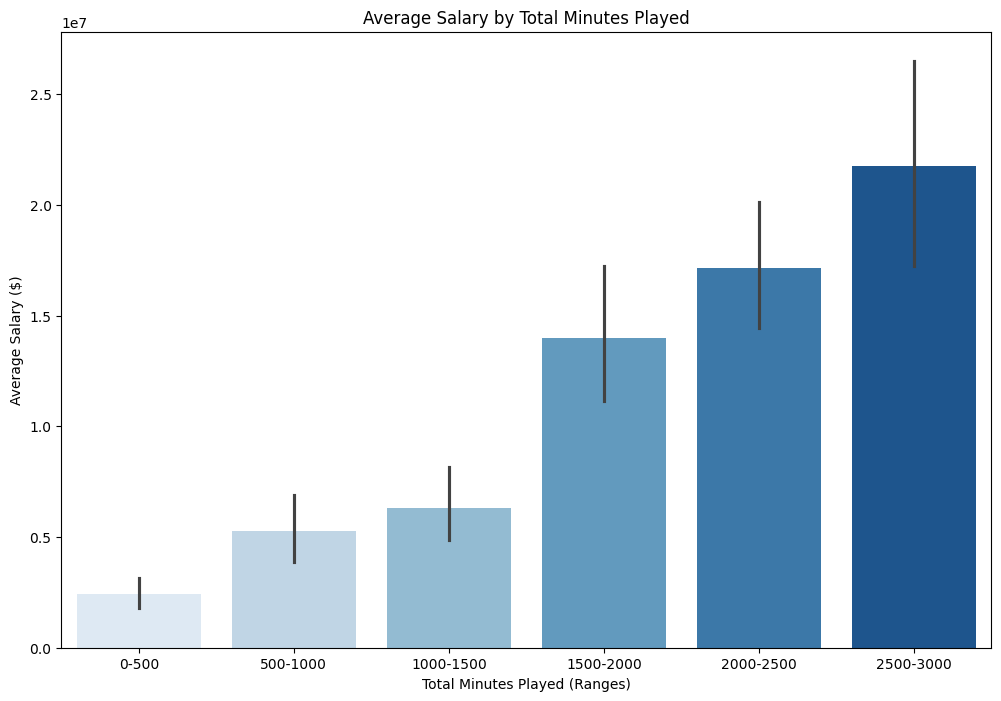

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Minutes_Bin', y='Salary', hue='Minutes_Bin', data=nba, palette='Blues', dodge=False)
plt.legend([],[], frameon=False)  # Removes redundant legend
plt.title('Average Salary by Total Minutes Played')
plt.xlabel('Total Minutes Played (Ranges)')
plt.ylabel('Average Salary ($)')
plt.show()


The table below also shows the relationship between Salaries and Total Minutes Played

In [10]:
df = (nba[['Salary' , 'Total Minutes']])
display(df)

,Salary,Total Minutes
0,48070014,1941
1,47345760,755
2,47080179,2126
3,44474988,1954
4,44119845,1672
...,...,...
462,35096,89
463,32795,28
464,32171,56
465,5849,35


This shows that there is a strong relation between the number of minutes played and player's salaries

## Teams

Different teams in NBA compete against each other and some have a higher winning rate than others. Let's see the amount of players in each team and then we can compare if being in a certain team effects the amount of salary you get.

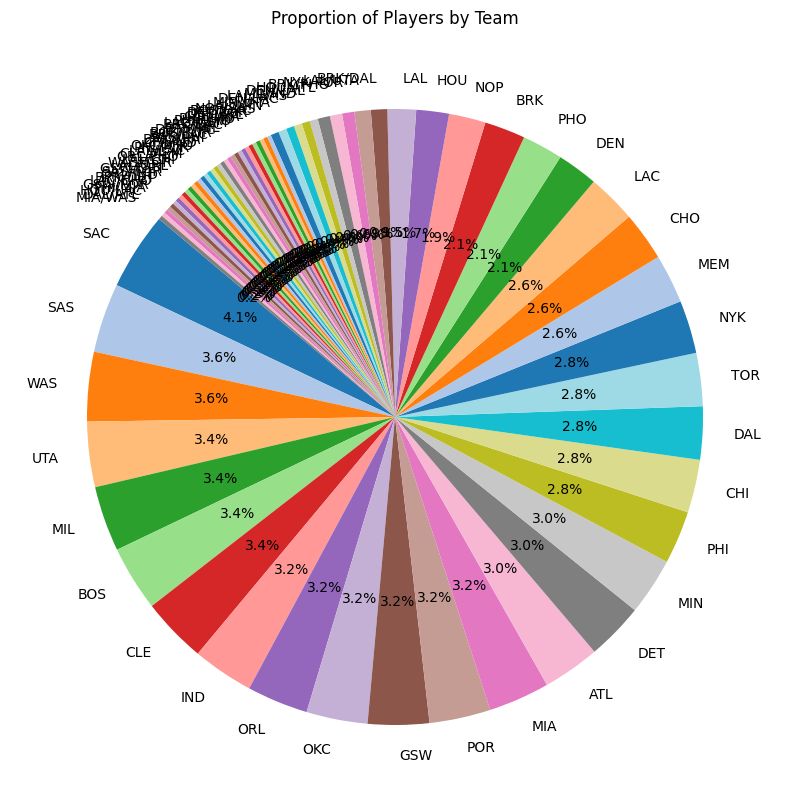

In [11]:
team_player_counts = nba['Team'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(
    team_player_counts, 
    labels=team_player_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors  # Use a vibrant color palette
)

plt.title('Proportion of Players by Team')
plt.show()

## Teams and Salary

The graph below shows how different teams make different salaries. For this plot, I will only show 35 teams to compare.

<ipython-input-12-2ffded9fdf9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team', y='Salary', data=nba, palette='coolwarm')


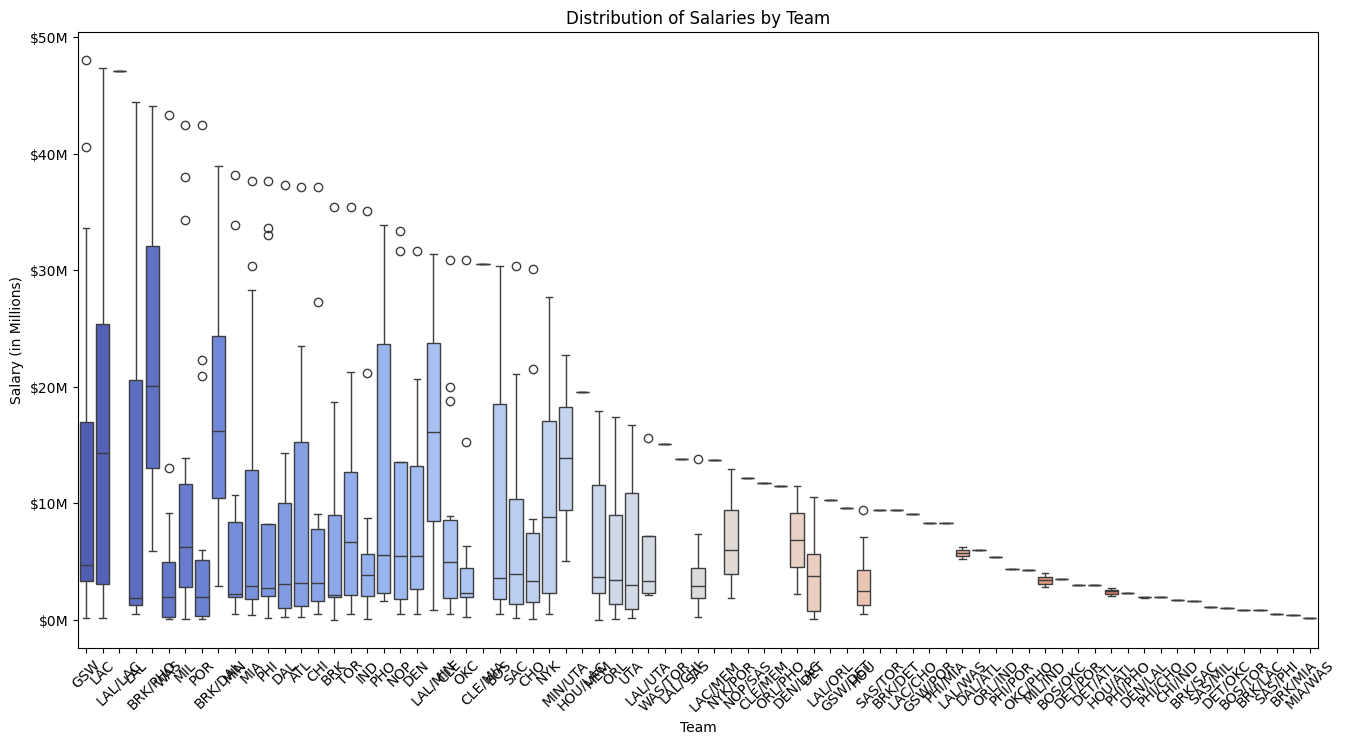

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Team', y='Salary', data=nba, palette='coolwarm')

plt.xticks(rotation=45)

ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x/1_000_000)}M'))

plt.title('Distribution of Salaries by Team')
plt.xlabel('Team')
plt.ylabel('Salary (in Millions)')

plt.show()

This suggests that being in a specific team alone does not make you have a higher salary. Your skills and other statistics matter a lot. The graph shows that the low points of all teams stand near the same area meaning that in almost each team there are players who are paid less and nearly equal to the lower-paid players of other teams. However, some teams do have a higher-paying low-end, therefore being in certain teams does have a slight effect on the player's salary.

# Discussion

In this assignment, I analyzed data from the NBA 2022-2023 season to see how player salaries are related to Points Per Game (PTS), Total Minutes Played per season, and the team a player is in. The results showed that both Points Per Game and Total Minutes Played have a noticeable impact on salaries, while the team a player belongs to has only a small effect. Players who score more points per game tend to earn higher salaries, as shown by the strong positive relationship in the graphs and tables. Similarly, players who play more minutes during the season are generally paid more, reflecting their value and contribution to the team. On the other hand, the team itself doesn’t seem to have much influence on salaries, meaning individual performance matters more than the specific team when deciding pay. Overall, the findings highlight that scoring and playing time are key factors in determining NBA salaries, while team affiliation plays only a minor role.

# References

1. Source Data - https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz
5. Pie Chart source - https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#pie-charts
6. Boxplot source - https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#boxplots
7. Histplot source - https://seaborn.pydata.org/generated/seaborn.histplot.html
7. Ticker source - https://stackoverflow.com/questions/44187290/matplotlib-ticker
8. Ytickers source - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
9. Custom fortmatting source - https://jupyterbook.org/en/stable/content/code-outputs.html
10. Pandas apply map source - https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff
11. Correlation Coefficient source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 
13. Float source - https://stackoverflow.com/questions/34264710/what-is-the-point-of-floatinf-in-python

